In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Data Exploration and Preprocessing:

In [2]:
df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# numerical column 
num_cols = df.select_dtypes(include=np.number).columns
num_cols.tolist()

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [9]:
# Standard Scaling 
scaler_standard = StandardScaler()
df_standard = scaler_standard.fit_transform(df[num_cols])
df_standard = pd.DataFrame(df_standard, columns=num_cols)


In [10]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df[num_cols])
df_minmax = pd.DataFrame(df_minmax, columns=num_cols)

In [11]:
df_standard.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [12]:
df_minmax.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


## standard scaling 
- centers data at mean 0 with unit variance
- when data is normally distributed

## Min -Max Scaling 
- Scales values to range [0, 1].
- when features have different units/scales and when algorithms require bounded values
  

# 2. Encoding Techniques

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [14]:
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols.tolist()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [15]:
one_hot_cols = [col for col in cat_cols if df[col].nunique() <= 5]
label_cols   = [col for col in cat_cols if df[col].nunique() > 5]

In [16]:
one_hot_cols

['race', 'sex', 'income']

In [17]:
label_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [18]:
# One-Hot Encoding using pandas get_dummies
df_onehot = pd.get_dummies(df[one_hot_cols], drop_first=True)

In [19]:
df_onehot.head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,False,False,False,True,True,False
1,False,False,False,True,True,False
2,False,False,False,True,True,False
3,False,True,False,False,True,False
4,False,True,False,False,False,False


In [20]:
# Apply Label Encoding
le = LabelEncoder()
df_label = df[label_cols].apply(lambda col: le.fit_transform(col))

In [21]:
df_label.head()

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5


In [22]:
# combine encoded data with numerical column
# Drop original categorical columns
df_encoded = df.drop(columns=cat_cols)


In [23]:
# Add encoded categorical data
df_encoded = pd.concat([df_encoded, df_onehot, df_label], axis=1)

In [24]:
df_encoded.shape

(32561, 18)

In [25]:
df_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,False,False,False,True,True,False,7,9,4,1,1,39
1,50,83311,13,0,0,13,False,False,False,True,True,False,6,9,2,4,0,39
2,38,215646,9,0,0,40,False,False,False,True,True,False,4,11,0,6,1,39
3,53,234721,7,0,0,40,False,True,False,False,True,False,4,1,2,6,0,39
4,28,338409,13,0,0,40,False,True,False,False,False,False,4,9,2,10,5,5


# One-Hot Encoding 
- ## Pros
- interpretable
- works well when categories are few

- ## Cons
- high memory usage
- increase dataset diamensionally

# Label Encoding 
- ## Pros
- does not increase diamensionally
- suitable for high cardinality categorical features

- ## Cons
- Some ML models may treat labels as numeric values, leading to bias.

# 3. Feature Engineering:

In [26]:
# 1. Age Grouping (Bucketize age into categories: Young, Middle, Senior)
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 25, 45, 65, 100], 
                         labels=['Young', 'Middle-Aged', 'Senior', 'Elder'])

In [27]:
# 2. Net Capital (Combine capital-gain and capital-loss into one feature)
df['net_capital'] = df['capital_gain'] - df['capital_loss']

df[['age', 'age_group', 'capital_gain', 'capital_loss', 'net_capital']].head()

,age,age_group,capital_gain,capital_loss,net_capital
0,39,Middle-Aged,2174,0,2174
1,50,Senior,0,0,0
2,38,Middle-Aged,0,0,0
3,53,Senior,0,0,0
4,28,Middle-Aged,0,0,0


In [28]:
# check skewnwss of numeric col
skew_values = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
skew_values

capital_gain      11.953848
net_capital       11.871934
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

-  capital_gain is highly skewed (means most values are 0)
-  Log transformation compresses large values and spreads out smaller values = reduces skewness, making the feature more suitable for models.

In [29]:
import numpy as np

# Apply log transformation (add 1 to avoid log(0))
df['log_capital_gain'] = np.log1p(df['capital_gain'])

# Compare before vs after
df[['capital_gain', 'log_capital_gain']].head()


,capital_gain,log_capital_gain
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


# 4. Feature Selection:

In [30]:
from sklearn.ensemble import IsolationForest

In [31]:
from sklearn.ensemble import IsolationForest

# Use only true numerical features (excluding fnlwgt and target)
num_cols = ['age', 'hours_per_week', 'capital_gain', 'capital_loss', 'education_num']

X = df[num_cols]   # Features only

iso = IsolationForest(contamination=0.05, random_state=42)
outlier_flags = iso.fit_predict(X)   # Do NOT pass y here

# Keep only inliers
df_outliers_removed = df[outlier_flags == 1]

print("Original Shape:", df.shape)
print("After Removing Outliers:", df_outliers_removed.shape)


Original Shape: (32561, 18)
After Removing Outliers: (30933, 18)


In [32]:
X = df[num_cols].astype(float)   # ensure numeric
outlier_flags = iso.fit_predict(X)


# Effects of Outliers 
- Outliers can skew mean, variance, and model coefficients.
- Outliers may cause overfitting
- Removing or treating outliers improves generalization.

In [33]:
!pip install ppscore

In [34]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [35]:
pps_matrix = pps.matrix(df_outliers_removed)

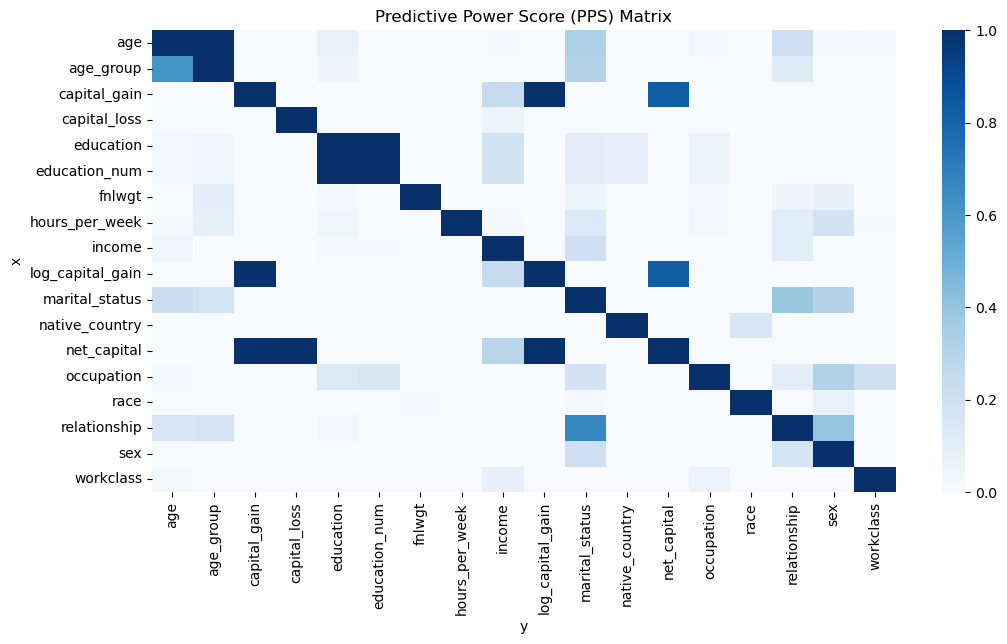

In [36]:
# PPS heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    pps_matrix.pivot(index="x", columns="y", values="ppscore"),
    cmap="Blues", annot=False
)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()


- PPS is better than correlation because:

- Correlation only measures linear relationships.

- PPS can capture non-linear relationships and works for both categorical & numerical data.

# PPS vs Correlation

- **Correlation Matrix**  - measures only linear relationships between numerical features.
- **PPS**- detect both linear and non-linear relationships and work with categorical data.